In [1]:
import data_loader
import numpy as np
import image_util
import matplotlib.pyplot as plt
import core

train_mat = data_loader.get_gender_train_matrix()
train_labels = data_loader.get_gender_train_labels()
test_mat = data_loader.get_gender_test_matrix()
test_labels = data_loader.get_gender_test_labels()
DPI = 120
IMG_PATH_PREFIX = 'writeup/images/'

# Plot the female-labeled pictures in train and test set

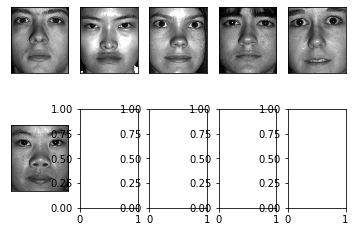

In [2]:
relevant_cols = np.argwhere(train_labels).flatten()
num_col = 5
fig, axes = plt.subplots(nrows=int(len(relevant_cols) / num_col) + 1, ncols=num_col)
for i, col in enumerate(relevant_cols):
  img = train_mat[:,col]
  ax_col = i % num_col
  ax_row = int(i / num_col)
  image_util.show_image(axes[ax_row][ax_col], image_util.vector_to_img(img, data_loader.CROPPED_IMG_SHAPE))
  

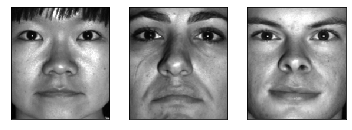

In [3]:
relevant_cols = np.argwhere(test_labels).flatten()
fig, axes = plt.subplots(nrows=1, ncols=len(relevant_cols))
for i, col in enumerate(relevant_cols):
  img = test_mat[:,col]
  image_util.show_image(axes[i], image_util.vector_to_img(img, data_loader.CROPPED_IMG_SHAPE))
  

# Plot the male-labeled pictures in train and test set

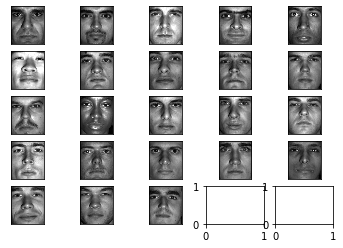

In [4]:
relevant_cols = np.argwhere(np.logical_not(train_labels)).flatten()
num_col = 5
fig, axes = plt.subplots(nrows=int(len(relevant_cols) / num_col) + 1, ncols=num_col)
for i, col in enumerate(relevant_cols):
  img = train_mat[:,col]
  ax_col = i % num_col
  ax_row = int(i / num_col)
  image_util.show_image(axes[ax_row][ax_col], image_util.vector_to_img(img, data_loader.CROPPED_IMG_SHAPE))
  

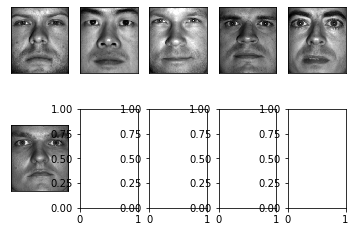

In [5]:
relevant_cols = np.argwhere(np.logical_not(test_labels)).flatten()
num_col = 5
fig, axes = plt.subplots(nrows=int(len(relevant_cols) / num_col) + 1, ncols=num_col)
for i, col in enumerate(relevant_cols):
  img = test_mat[:,col]
  ax_col = i % num_col
  ax_row = int(i / num_col)
  image_util.show_image(axes[ax_row][ax_col], image_util.vector_to_img(img, data_loader.CROPPED_IMG_SHAPE))
  

# SVM cross-validation and test

In [6]:
from sklearn.svm import SVC
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
  for C in [0.1, 0.5, 1, 2]:
    model = SVC(kernel = kernel, C = C)
    print(f"Kernel = {kernel}, C = {C}, F1 = {core.get_kfold_f1(model, train_mat, train_labels)}")

Kernel = linear, C = 0.1, F1 = 0.65
Kernel = linear, C = 0.5, F1 = 0.65
Kernel = linear, C = 1, F1 = 0.65
Kernel = linear, C = 2, F1 = 0.65
Kernel = poly, C = 0.1, F1 = 0.4
Kernel = poly, C = 0.5, F1 = 0.4
Kernel = poly, C = 1, F1 = 0.4
Kernel = poly, C = 2, F1 = 0.4
Kernel = rbf, C = 0.1, F1 = 0.0
Kernel = rbf, C = 0.5, F1 = 0.0
Kernel = rbf, C = 1, F1 = 0.0
Kernel = rbf, C = 2, F1 = 0.0
Kernel = sigmoid, C = 0.1, F1 = 0.0
Kernel = sigmoid, C = 0.5, F1 = 0.0
Kernel = sigmoid, C = 1, F1 = 0.0
Kernel = sigmoid, C = 2, F1 = 0.0


Train f1 = 1.0
Test f1 = 0.5
Number of correctly identified males = 6
Number of correctly identified females = 1
Number of males misidentified as females = 0
Number of females misidentified as males  = 2
0-> 0
1-> 1
1-> 0


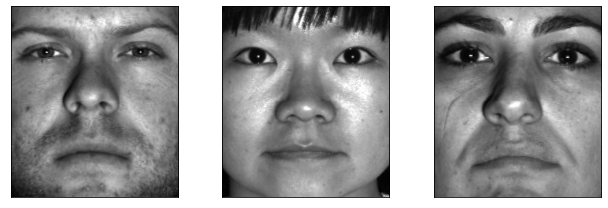

In [7]:
from sklearn.metrics import f1_score
best_svm = SVC(kernel = 'linear')
best_svm.fit(train_mat.T, train_labels)
train_preds = best_svm.predict(train_mat.T)
train_f1 = f1_score(train_labels, train_preds)
print(f"Train f1 = {train_f1}")
test_preds = best_svm.predict(test_mat.T)
test_f1 = f1_score(test_labels, test_preds)
print(f"Test f1 = {test_f1}")
fig = core.gender_analyze_errors(test_labels, test_preds, test_mat)

fig.tight_layout()
fig.savefig(IMG_PATH_PREFIX + 'gender_errors.png', format='png', dpi=DPI)

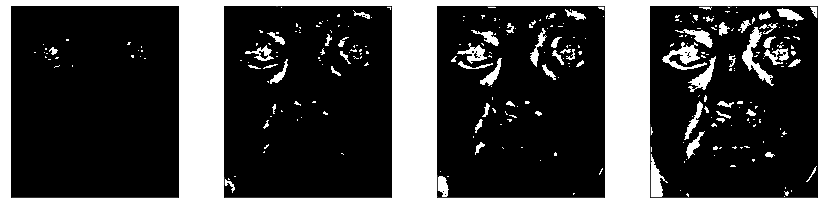

In [8]:
fig, axes = plt.subplots(nrows=1, ncols = 4, figsize=(12, 3))
for i, num_pixels_to_plot in enumerate([100,1000,2000,4000]):
  important_pixel_indices = np.argsort(np.abs(best_svm.coef_[0]))[::-1][:num_pixels_to_plot]
  important_pixels = np.zeros(data_loader.CROPPED_IMG_SHAPE)
  for pixel_index in important_pixel_indices:
    r = pixel_index // data_loader.CROPPED_IMG_SHAPE[1]
    c = pixel_index % data_loader.CROPPED_IMG_SHAPE[1]
    important_pixels[r,c] = 1
  image_util.show_image(axes[i], important_pixels)

fig.tight_layout()
fig.savefig(IMG_PATH_PREFIX + 'gender_importance.png', format='png', dpi=DPI)

# KNN cross validation and test

In [9]:
from sklearn.neighbors import KNeighborsClassifier
for n_neighbors in [1,3,5,7,9]:
  model = KNeighborsClassifier(n_neighbors=n_neighbors)
  print(f"n_neighbors = {n_neighbors}, F1 = {core.get_kfold_f1(model, train_mat, train_labels)}")
  

n_neighbors = 1, F1 = 0.4
n_neighbors = 3, F1 = 0.5
n_neighbors = 5, F1 = 0.0
n_neighbors = 7, F1 = 0.0
n_neighbors = 9, F1 = 0.0


Train f1 = 0.5
Test f1 = 0.8
Number of correctly identified males = 6
Number of correctly identified females = 2
Number of males misidentified as females = 0
Number of females misidentified as males  = 1
0-> 0
1-> 1
1-> 0


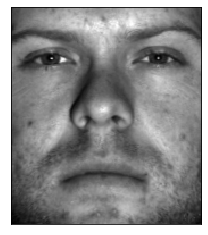

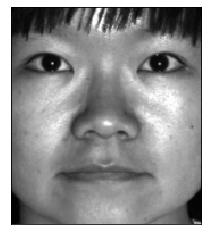

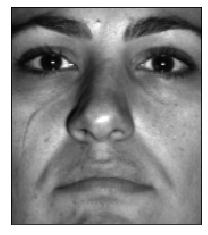

In [10]:
best_knn = KNeighborsClassifier(n_neighbors=3)
best_knn.fit(train_mat.T, train_labels)
train_preds = best_knn.predict(train_mat.T)
train_f1 = f1_score(train_labels, train_preds)
print(f"Train f1 = {train_f1}")
test_preds = best_knn.predict(test_mat.T)
test_f1 = f1_score(test_labels, test_preds)
print(f"Test f1 = {test_f1}")
core.gender_analyze_errors(test_labels, test_preds, test_mat)